In [1]:
import pandas as pd
from pandas import DataFrame 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import pylab
import seaborn as sns

# Part 1: Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
print('# of Rows:', len(df))
print('# of Columns:',len(df.columns))
summary = df.describe()
print(summary)

# of Rows: 506
# of Columns: 14
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.67403

We can see that there are 506 instances and 14 rows (13 features and 1 target). 

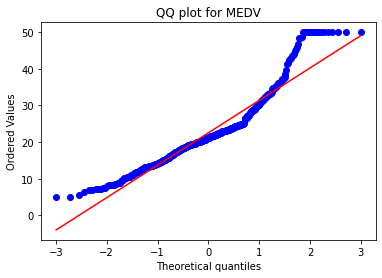

In [4]:
#MEDV QQ Plot
stats.probplot(df['MEDV'],dist='norm',plot=pylab)
plt.title('QQ plot for MEDV')
pylab.show()

From the qq-plot, we can tell that MEDV is not strictly normally distributed, especially for the datapoionts largee than 2 std.

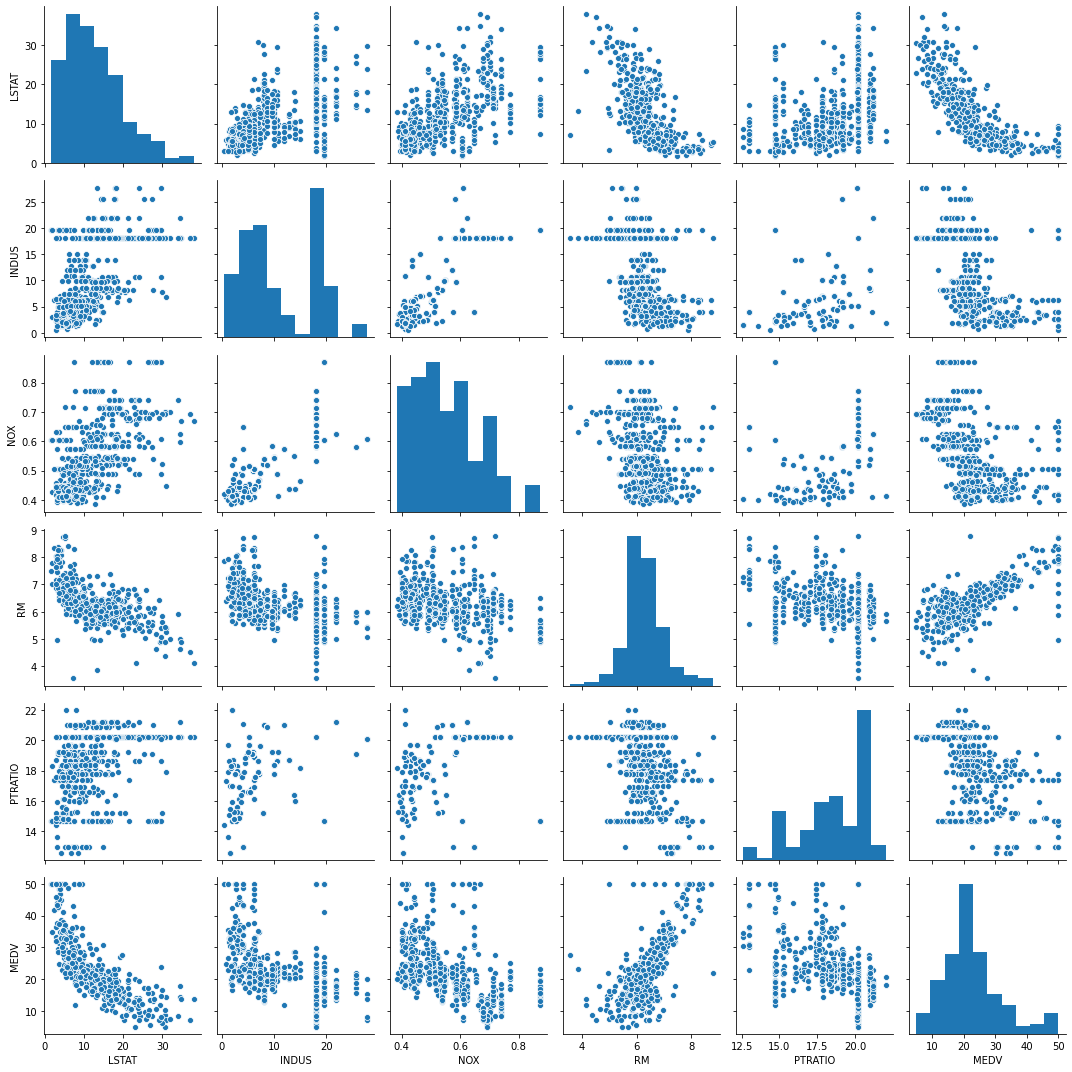

In [5]:
# Scatterplot of a few selected features
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'PTRATIO','MEDV']
sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

From the Scatterplot, we can see that RM is positively coorelated with MEDV, and LSTAT is most nagatively coorelated with MEDV.

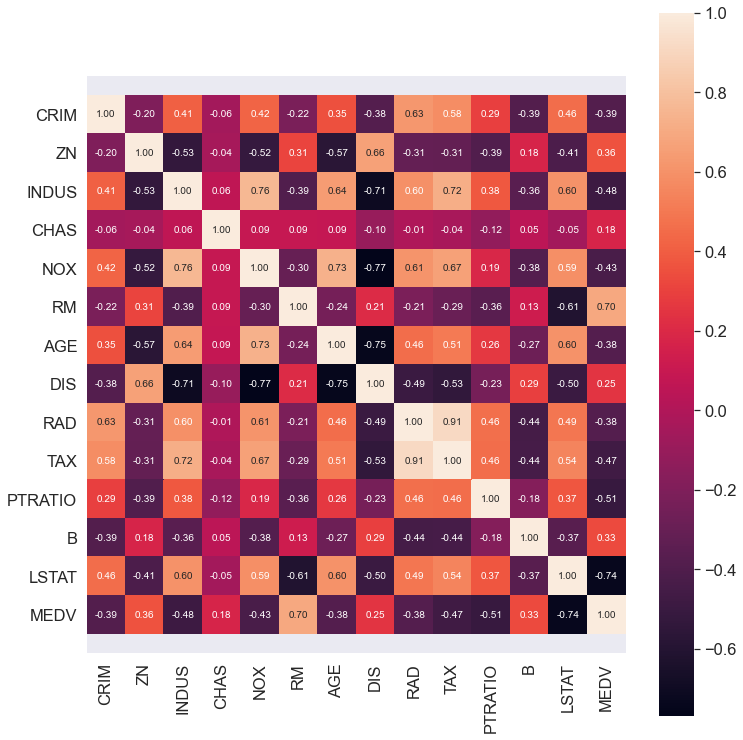

In [6]:
#Heatmap & Correlation Matrix
cm = np.corrcoef(df.values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(11, 11))
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 10},yticklabels=df.columns,xticklabels=df.columns)

bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.show()

From the heatmap, for the target MEDV, we can see that LSTAT is most coorelated feature with correlation efficient of -0.74.Also, RM is the most positively cooralted feature, with correlation efficient of 0.7. 

In [7]:
#Split Data into Training and Testing Sets
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Use random_state = 42. Use 80% of the data for the training set.  The same split will be used for all models.

# Part 2: Linear regression

In [8]:
#create and fit LinearRegression model
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [9]:
#model coefficients 
slr.coef_

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

In [10]:
#y intercept
slr.intercept_

30.246750993923495

(-10.0, 50.0)

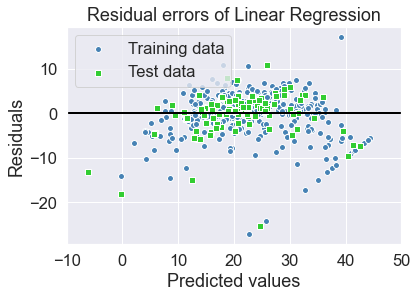

In [11]:
#plot the residual errors
y_train_pred=slr.predict(X_train)
y_test_pred=slr.predict(X_test)
plt.scatter(y_train_pred,  y_train_pred - y_train,c='steelblue', marker='o', edgecolor='white',label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,c='limegreen', marker='s', edgecolor='white',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual errors of Linear Regression')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])

In [12]:
#calculate performance metrics: MSE and R2
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

MSE train: 21.641, test: 24.291
R^2 train: 0.751, test: 0.669


We observe that training data has greater residuals than test data. Also, the R^2 score for both train set and test set are greater than 0.6 (max 1.0), it shows that the linear regression model was not bad, but there is room for imporvements.

# Part 3 : Ridge regression & LASSO regression

## Part 3.1: Ridge regression

In [28]:
from sklearn.linear_model import Ridge, RidgeCV
from yellowbrick.regressor import AlphaSelection
from yellowbrick.regressor.alphas import alphas

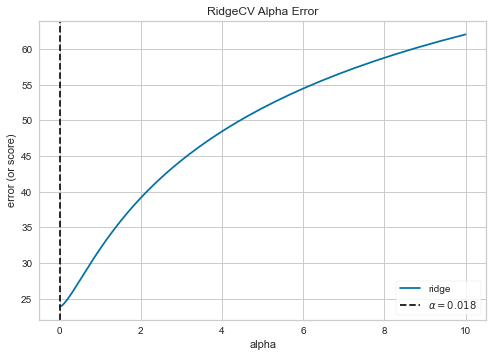

In [14]:
#find best alpha
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = RidgeCV(alphas=alphas,normalize = True)
visualizer = AlphaSelection(model)
visualizer.fit(X_train,y_train)
visualizer.show()

As the AlphaSelection helped us to demonstrate, the best alpha is 0.018.

In [15]:
#create and fit Ridge model
alpha_r = 0.018
ridge = Ridge(alpha=alpha_r,normalize = True)

ridge.fit(X_train, y_train)
y_train_r_pred = ridge.predict(X_train)
y_test_r_pred = ridge.predict(X_test)

In [16]:
#model coefficients 
ridge.coef_

array([-1.06034707e-01,  2.52286303e-02,  1.80322815e-02,  2.87011370e+00,
       -1.54436821e+01,  4.48747160e+00, -6.51494051e-03, -1.33249034e+00,
        2.08171143e-01, -8.16241007e-03, -8.86029189e-01,  1.21666784e-02,
       -4.96439250e-01])

In [17]:
#y intercept
ridge.intercept_

27.686341664950824

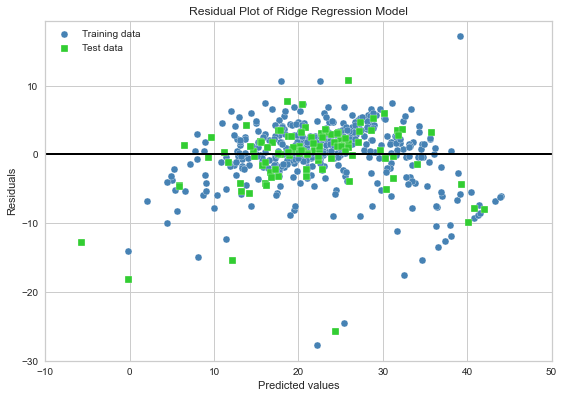

In [18]:
#plot the residual errors
plt.scatter(y_train_r_pred,  y_train_r_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_r_pred,  y_test_r_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.title("Residual Plot of Ridge Regression Model")
plt.show()

In [19]:
#calculate performance metrics: MSE and R2
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_r_pred),mean_squared_error(y_test, y_test_r_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_r_pred),r2_score(y_test, y_test_r_pred)))

MSE train: 21.694, test: 24.444
R^2 train: 0.750, test: 0.667


Compare to Linear Regression: MSE train: 21.641, test: 24.291; R^2 train: 0.751, test: 0.669.
                    
We noticed that MSE using Ridge model is just slightly larger than Linear Regression model, and R^2 scores are slightly smaller. They are similar because the alpha we used is small alpha = 0.018.

## Part 3.2: LASSO regression

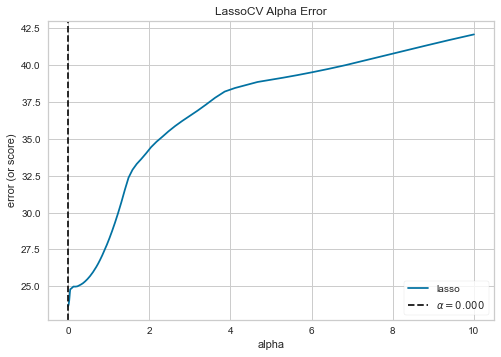

In [20]:
from sklearn.linear_model import Lasso,LassoCV
#find best alpha
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train,y_train)
visualizer.show()

As the AlphaSelection helped us to demonstrate, the best alpha is 0.000. However, if we set alpha to be 0, it's going to be equivalent to linear regression model. Thus, let set alpha to be 1 to see what will be different. 

In [21]:
#create and fit Ridge model
alpha_l = 1
lasso = Lasso(alpha=alpha_l)
lasso.fit(X_train,y_train)

y_train_l_pred = lasso.predict(X_train)
y_test_l_pred = lasso.predict(X_test)

In [22]:
#model coefficients 
lasso.coef_

array([-0.07660927,  0.02850064, -0.        ,  0.        , -0.        ,
        1.63048892,  0.01639478, -0.63085765,  0.21965363, -0.01228558,
       -0.70858233,  0.0111811 , -0.74710661])

In [23]:
#y intercept
lasso.intercept_

34.935780377911904

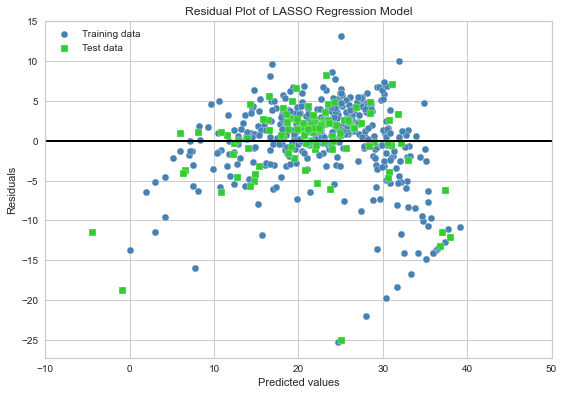

In [24]:
#plot the residual errors
plt.scatter(y_train_l_pred,  y_train_l_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_l_pred,  y_test_l_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.title("Residual Plot of LASSO Regression Model")
plt.show()

In [25]:
#calculate performance metrics: MSE and R2
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_l_pred),mean_squared_error(y_test, y_test_l_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_l_pred),r2_score(y_test, y_test_l_pred)))

MSE train: 26.417, test: 24.409
R^2 train: 0.696, test: 0.667


Compare to Linear Regression: MSE train: 21.641, test: 24.291; R^2 train: 0.751, test: 0.669.

Note that we set alpha to be 1, instead of as 0 as determined.

We noticed that MSE using LASSO model is larger than Linear Regression model, and R^2 scores get smaller. That is to say, introducing LASSO model with alpha = 1 (intentionally), is not helping us to improve the prediction.

# Part 4: Conclusions

We used Linear regerssion,Ridge regression, LASSO regression to fit our datapoints and develop a model. We measured MSE and R^2 scores to compare different models.

As a result, Linear regerssion achieved the smallest MSE (MSE train: 21.641, test: 24.291) and the highest R^2 (0.751, test: 0.669). 

Because the best alpha for both Ridge regression and LASSO regression are determined to be very small, the model fitting results are similar for all three models. Introduciton more complex model does not necessarily improve our prediction.

# Part 5: Appendix

Link to github repo : https://github.com/TakumiDawn/Machine-Learning-in-Finance-Lab/tree/master/IE517_F20_HW4

In [26]:
print("My name is Takumi Li")
print("My NetID is: feiyang3")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Takumi Li
My NetID is: feiyang3
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
